In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

In [28]:
iris_data = pd.DataFrame(iris.data)

In [29]:
iris_data.columns = iris.feature_names

In [30]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_data = scaler.fit_transform(iris_data)

In [32]:
iris_data.shape

(150, 4)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
pca

PCA(n_components=2)

In [35]:
pca_scaled = pca.fit_transform(iris_data)

In [36]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

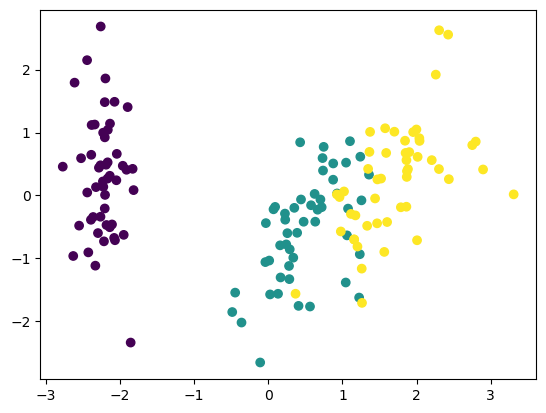

In [37]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=iris.target, cmap='viridis')

In [38]:
# agglomerative clustering

import scipy.cluster.hierarchy as sc

Text(0, 0.5, 'Euclidean Distance')

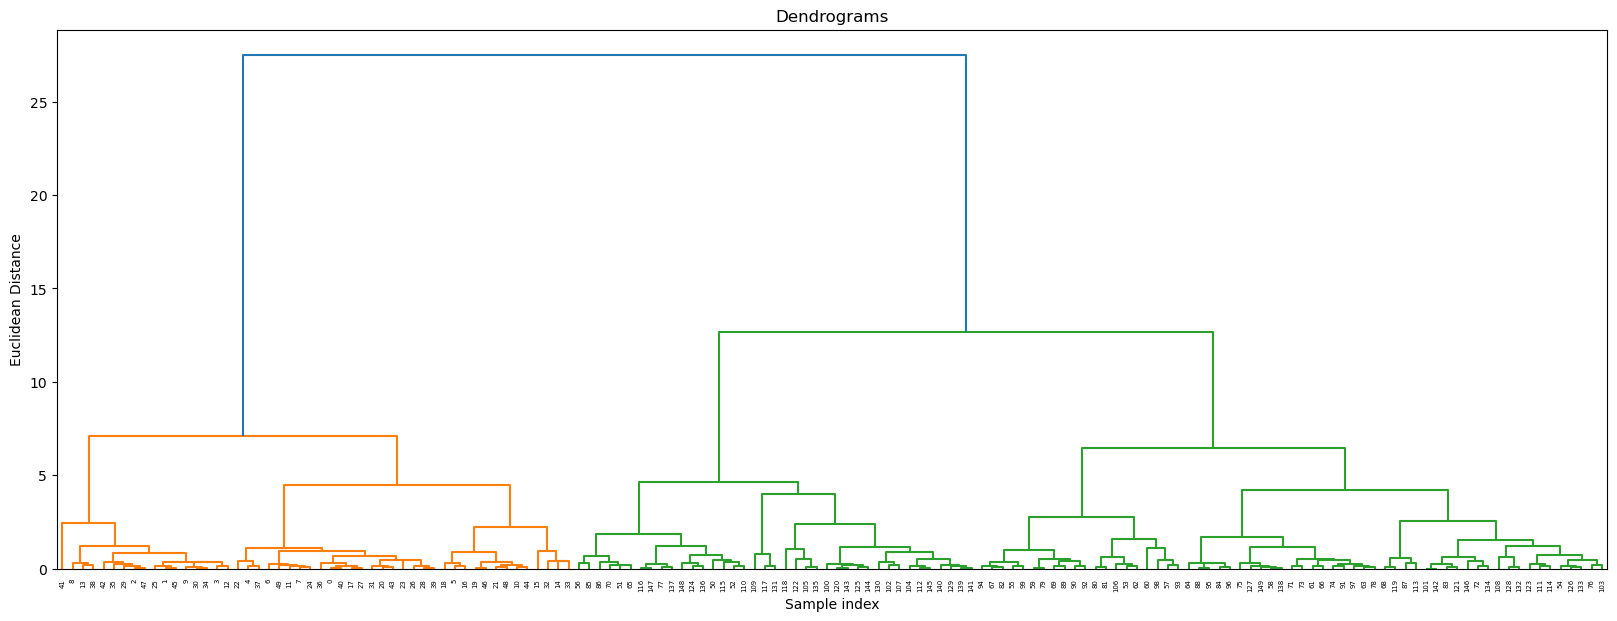

In [39]:
plt.figure(figsize=(20, 7))
plt.title('Dendrograms')

#create the dendrogram
sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title('Dendrograms')
plt.xlabel('Sample index')
plt.ylabel('Euclidean Distance')

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [43]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

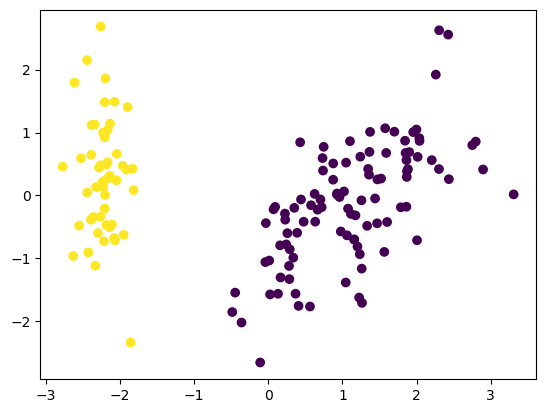

In [44]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=cluster.labels_, cmap='viridis')

In [45]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

for i in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=i, metric='euclidean', linkage='ward')
    agglo.fit(iris_data)
    score = silhouette_score(iris_data, agglo.labels_)
    silhouette_scores.append(score)

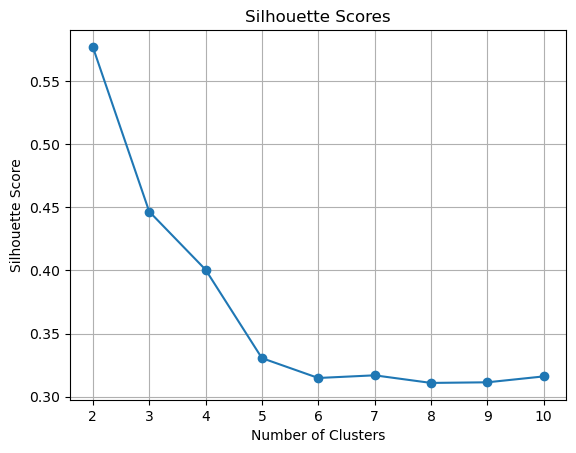

In [47]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()